<h1 align="center">Machine Learning and Vision Lab</h1>
<h4 align="center">Dr. Mohammadzadeh</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Amir Hossein Yari - 99102507</h4>
<h4 align="center">Lab 7 - Methods of Gabor, HOG and LBP for Building Descriptors</h4>

In [29]:
# Import required package
import cv2 
import numpy as np 
from matplotlib import pyplot as plt 
import os
import random
from skimage import exposure, feature
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from skimage import io, color, feature
from skimage import img_as_ubyte

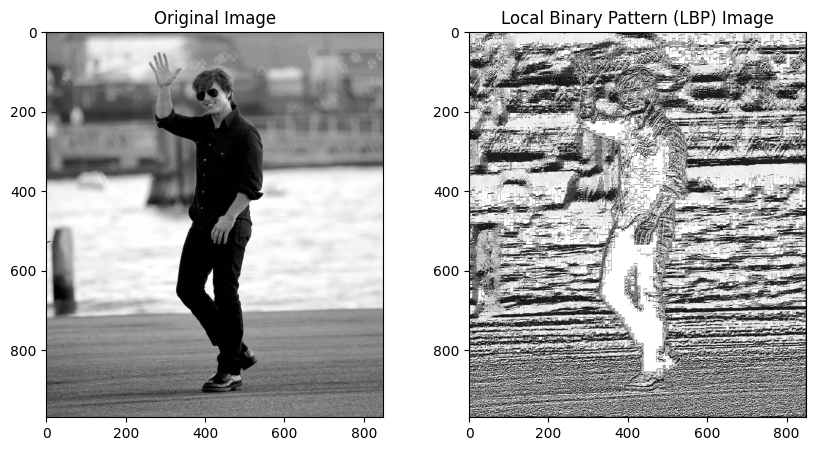

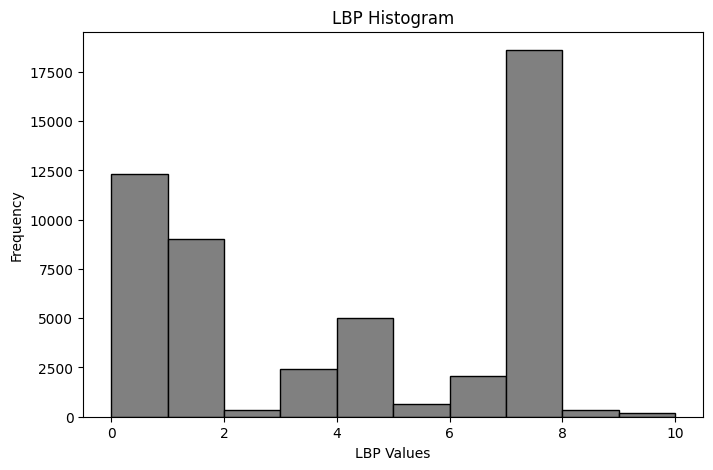

In [26]:
# Load the image
image_path = "image.jpg"
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Convert the image to uint8 format
gray_image_uint8 = img_as_ubyte(gray_image)

# Set the parameters for the local binary pattern
P = 8
R = 1

# Apply the local binary pattern
lbp_image = feature.local_binary_pattern(gray_image_uint8, P, R, method='default')

# Display the original and LBP images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(lbp_image, cmap='gray')
plt.title('Local Binary Pattern (LBP) Image')

plt.show()

# Plot the histogram of LBP values
plt.figure(figsize=(8, 5))
plt.hist(lbp_image.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2), color='gray', edgecolor='black')
plt.title('LBP Histogram')
plt.xlabel('LBP Values')
plt.ylabel('Frequency')
plt.show()


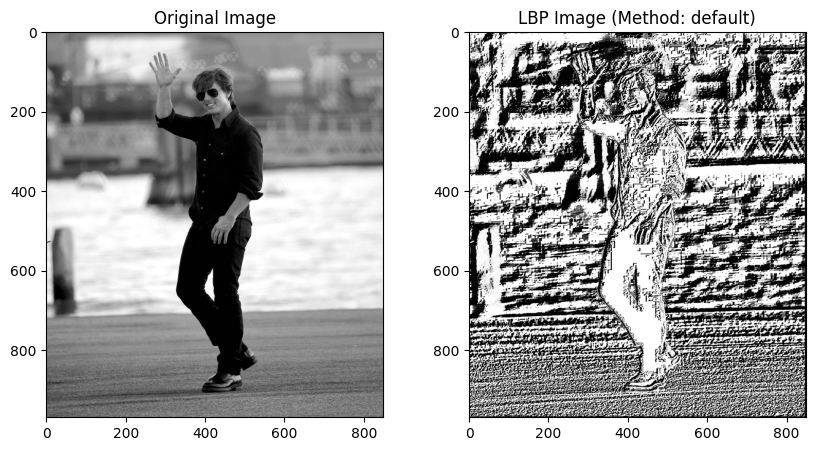

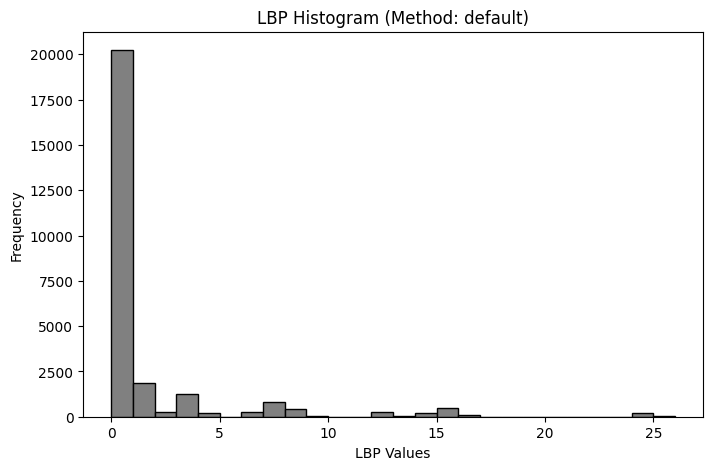

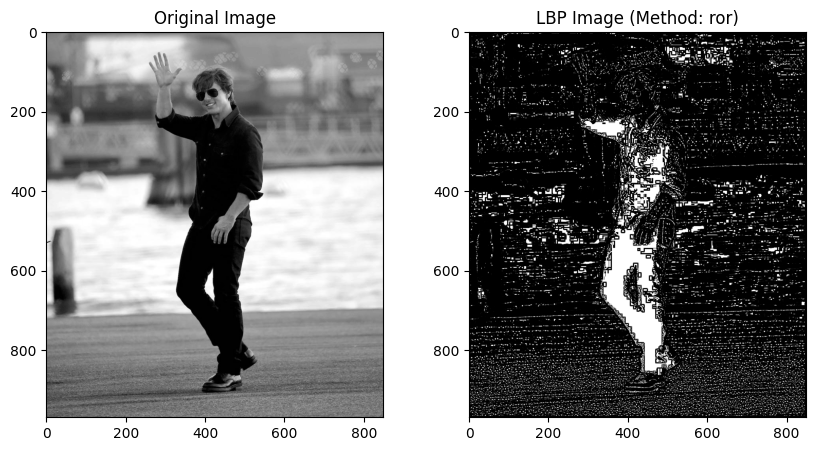

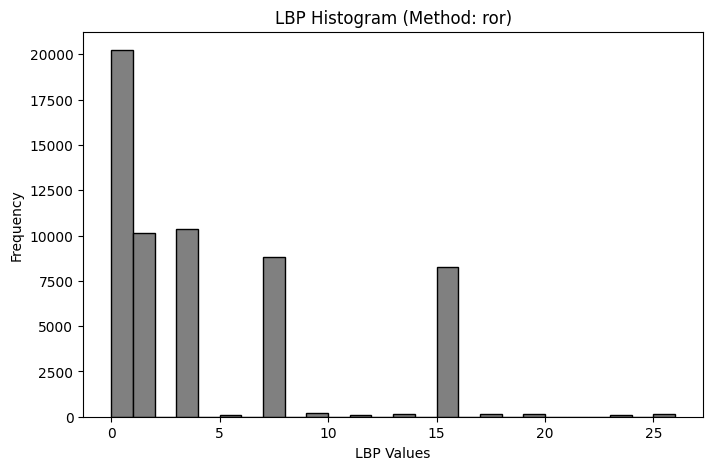

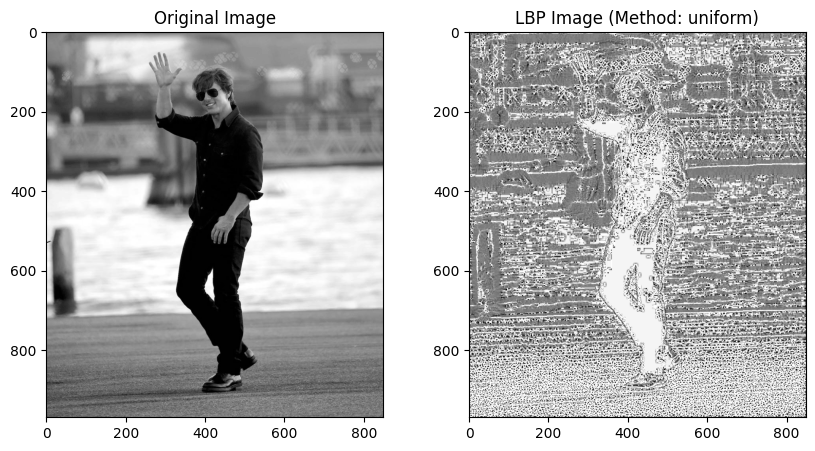

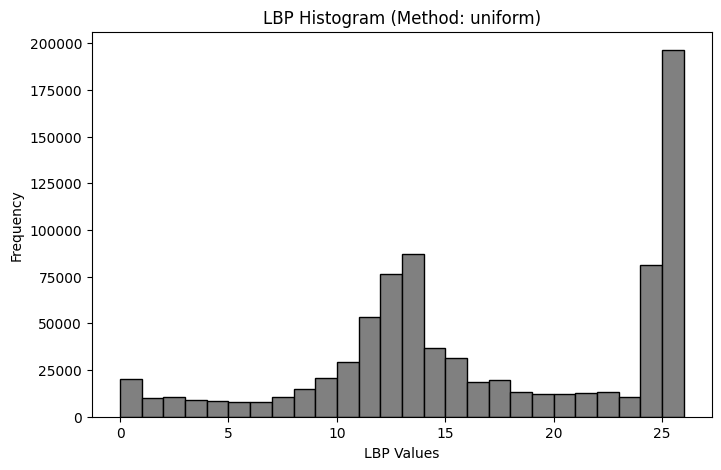

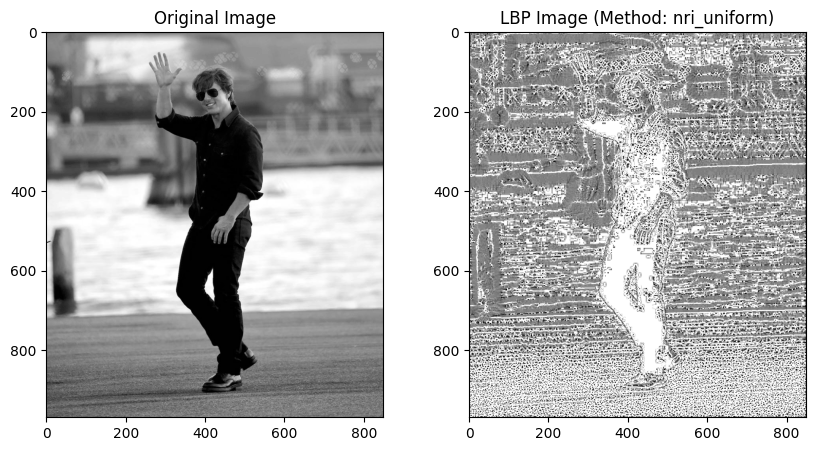

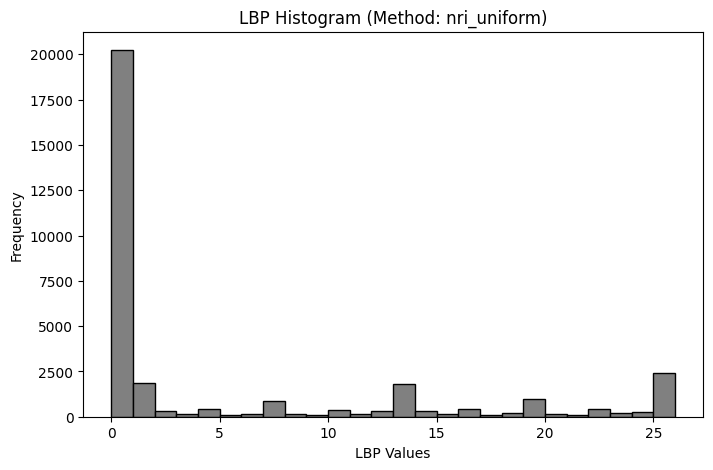

In [30]:
# List of methods
methods = ['default', 'ror', 'uniform', 'nri_uniform']

# Loop through each method
for method in methods:
    # Apply the local binary pattern
    lbp_image = feature.local_binary_pattern(gray_image_uint8, P, R, method=method)

    # Display the original and LBP images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image, cmap='gray')
    plt.title(f'LBP Image (Method: {method})')

    plt.show()

    # Plot the histogram of LBP values
    plt.figure(figsize=(8, 5))
    plt.hist(lbp_image.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2), color='gray', edgecolor='black')
    plt.title(f'LBP Histogram (Method: {method})')
    plt.xlabel('LBP Values')
    plt.ylabel('Frequency')
    plt.show()

<span style="color: green;">

1. **Default Method:**
   - The default method does not impose any specific constraints on the patterns generated by the Local Binary Pattern (LBP) algorithm. Therefore, the numerical range of the resulting feature vector is not explicitly defined and may vary depending on the content of the input image.

2. **ROR (Rotation-Invariant Uniform Patterns):**
   - This method generates rotation-invariant uniform patterns. Uniform patterns are those where the binary pattern has at most two bitwise transitions (0 to 1 or 1 to 0) when read in a circular manner. The numerical range for this method is [0, P+2], where P is the number of points considered in the LBP computation. The addition of 2 to P accounts for the possible combinations of patterns.

3. **Uniform Method:**
   - The uniform method specifically extracts uniform patterns. Uniform patterns are those where the binary pattern has at most two bitwise transitions (0 to 1 or 1 to 0) when read in a circular manner. The numerical range for this method is [0, P], where P is the number of points considered in the LBP computation.

4. **NRI_Uniform (Non-Rotation-Invariant Uniform Patterns):**
   - This method generates non-rotation-invariant uniform patterns. Similar to the uniform method, it extracts patterns with at most two bitwise transitions when read in a circular manner. The numerical range for this method is [0, P], where P is the number of points considered in the LBP computation.
</span>

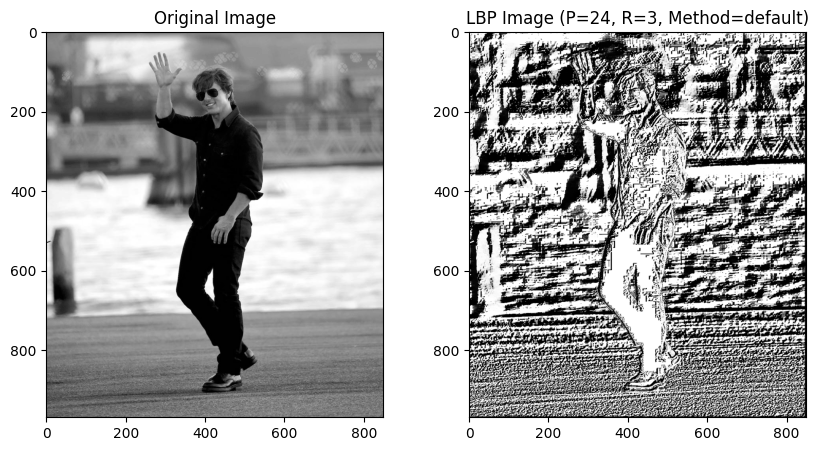

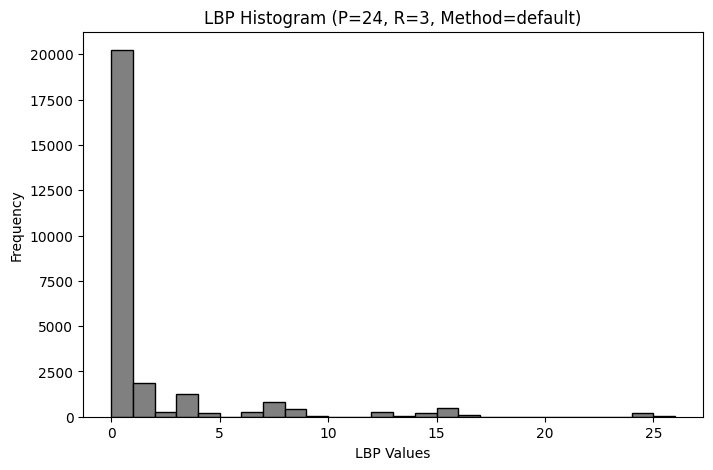

In [28]:
# Set parameters for the local binary pattern
P = 24
R = 3
method = 'default'

# Apply the local binary pattern
lbp_image = feature.local_binary_pattern(gray_image_uint8, P, R, method=method)

# Display the original and updated LBP images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(lbp_image, cmap='gray')
plt.title(f'LBP Image (P={P}, R={R}, Method={method})')

plt.show()

# Plot the histogram of updated LBP values
plt.figure(figsize=(8, 5))
plt.hist(lbp_image.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2), color='gray', edgecolor='black')
plt.title(f'LBP Histogram (P={P}, R={R}, Method={method})')
plt.xlabel('LBP Values')
plt.ylabel('Frequency')
plt.show()

In [76]:
def apply_gabor_filters(image, angles):
    filtered_images = []
    for angle in angles:
        # Generate Gabor kernel
        kernel = cv2.getGaborKernel(
            (21, 21), sigma=5, theta=np.radians(angle), lambd=10, gamma=0.5, psi=0
        )

        # Apply Gabor filter to the image
        filtered = cv2.filter2D(image, cv2.CV_8U, kernel)

        filtered_images.append(filtered)
    return filtered_images

def plot_images(images, titles):
    plt.figure(figsize=(12, 6))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

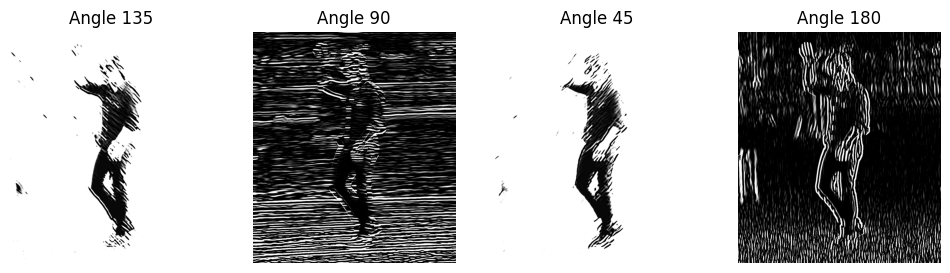

In [77]:
# Load an image
image_path = 'image.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Define angles for Gabor filters
angles = [135, 90, 45, 180]

# Apply Gabor filters with different angles
filtered_images = apply_gabor_filters(image, angles)

# Display the filtered images
plot_images(filtered_images, titles=[f"Angle {angle}" for angle in angles])

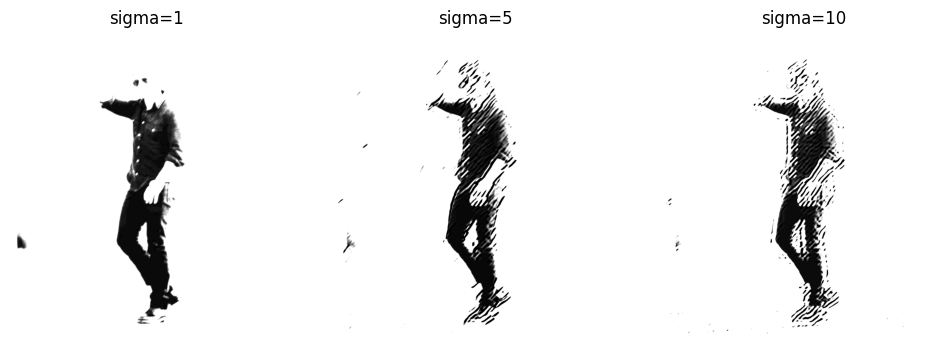

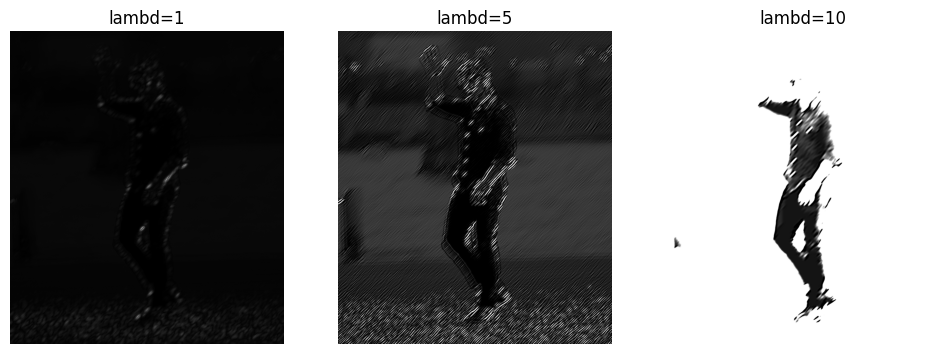

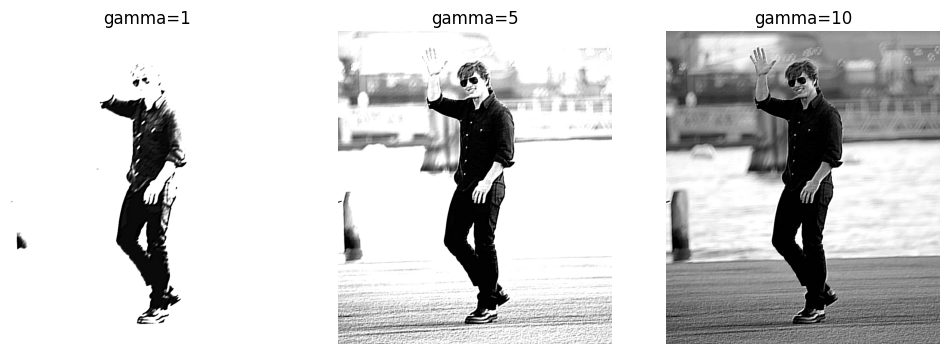

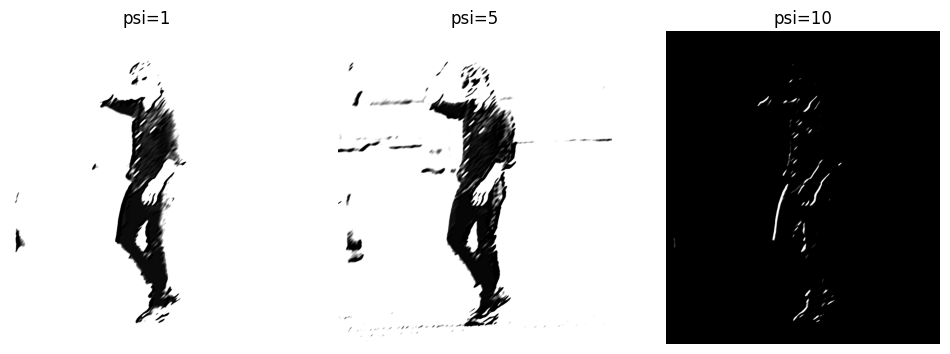

In [78]:
def vary_parameters_and_filter(image, parameter_name, parameter_values):
    filtered_images = []
    constant_parameters = {'sigma': 3, 'lambd': 10, 'gamma': 0.5, 'psi': 0}
    
    for value in parameter_values:
        parameters = constant_parameters.copy()
        parameters[parameter_name] = value

        kernel = cv2.getGaborKernel((21, 21),
                                    sigma=parameters['sigma'],
                                    theta=np.radians(45),
                                    lambd=parameters['lambd'],
                                    gamma=parameters['gamma'],
                                    psi=parameters['psi'])

        filtered = cv2.filter2D(image, cv2.CV_8U, kernel)
        filtered_images.append(filtered)
    return filtered_images

# Vary each parameter independently and store the results
parameter_values = [1, 5, 10]
parameters_to_vary = ['sigma', 'lambd', 'gamma', 'psi']

for parameter_name in parameters_to_vary:
    filtered_images = vary_parameters_and_filter(image, parameter_name, parameter_values)
    plot_images(filtered_images, titles=[f"{parameter_name}={value}" for value in parameter_values])


<span style="color: green;">

## Analysis of Gabor Filter Parameter Variations

### 1. Sigma (σ):
- A higher sigma value results in a wider spatial extent for the Gabor filter.
- As sigma increases, the filter becomes more spatially spread, capturing larger patterns or structures in the image.

### 2. Lambda (λ):
- Lambda controls the wavelength of the sinusoidal factor of the Gabor function.
- Increasing lambda results in a larger distance between alternating bright and dark regions in the filter response.

### 3. Gamma (γ):
- Gamma controls the aspect ratio of the elliptical support of the Gabor function.
- A higher gamma value makes the filter more elongated and oriented towards capturing specific features in a particular direction.

### 4. Psi (ψ):
- Psi represents the phase offset of the sinusoidal factor.
- Changing psi results in a shift in the phase of the filter response.
</span>

In [22]:
def detect_person_hog(image_path):
    image = cv2.imread(image_path)

    # Initialize the HOG descriptor
    hog = cv2.HOGDescriptor()
    hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

    # Detect people in the image
    boxes, weights = hog.detectMultiScale(image, winStride=(8, 8), padding=(4, 4), scale=1.05)

    # Draw bounding boxes around detected people
    for (x, y, w, h) in boxes:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the result
    plt.imshow(image_rgb)
    plt.title("Person Detection with HOG")
    plt.axis('off')
    
    # Draw bounding boxes on the displayed image
    for (x, y, w, h) in boxes:
        plt.plot([x, x + w, x + w, x, x], [y, y, y + h, y + h, y], color='lime', linewidth=2)

    plt.show()

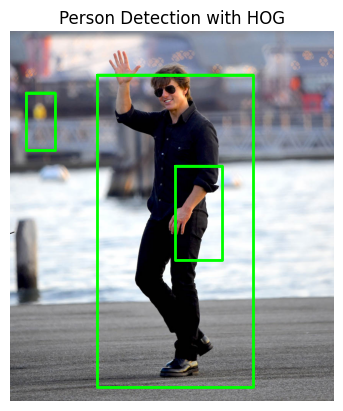

In [23]:
image_path = 'image.jpg'
detect_person_hog(image_path)

In [84]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
    return images

def extract_hog_features(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Extract HOG features
    hog_features = feature.hog(gray, orientations=9, pixels_per_cell=(8, 8),
                               cells_per_block=(2, 2), block_norm='L2-Hys')

    return hog_features

In [85]:
# Load images from the "happy" and "disgust"
happy_images = load_images_from_folder("happy")
disgust_images = load_images_from_folder("disgust")

# Shuffle the images to randomize the selection
random.shuffle(happy_images)
random.shuffle(disgust_images)

# Select desired number of images for training from each category
happy_train_images = happy_images[:65]
disgust_train_images = disgust_images[:35]

# Use the remaining images as the test set
happy_test_images = happy_images[65:]
disgust_test_images = disgust_images[35:]


# Combine the train and test sets
train_images = happy_train_images + disgust_train_images
test_images = happy_test_images + disgust_test_images

# Define the class labels for the training data
class_labels_train = [0] * len(happy_train_images) + [1] * len(disgust_train_images) # 0 for "happy," 1 for "disgust"

# Define the class labels for the training data
class_labels_test = [0] * len(happy_test_images) + [1] * len(disgust_test_images) # 0 for "happy," 1 for "disgust"

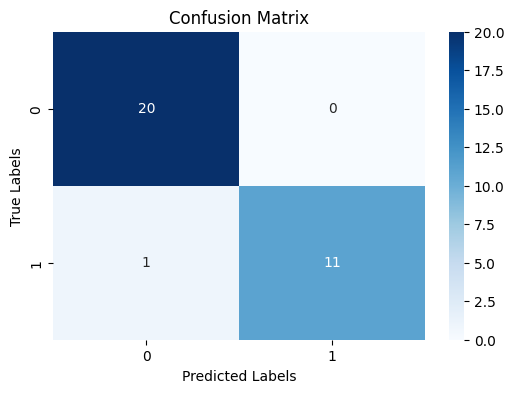


Accuracy: 0.96875


In [87]:
# Extract HOG features for each image in the dataset
X_train = [extract_hog_features(image) for image in train_images]
y_train = np.array(class_labels_train)
# Convert the lists to numpy arrays
X_train = np.array(X_train)

# Extract HOG features for each image in the dataset
X_test = [extract_hog_features(image) for image in test_images]
y_test = np.array(class_labels_test)
# Convert the lists to numpy arrays
X_test = np.array(X_test)

# Standardize the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_scaled)

# Calculate confusion matrix and accuracy
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
print("\nAccuracy:", accuracy)